## Distribusi jumlah kata per tweet

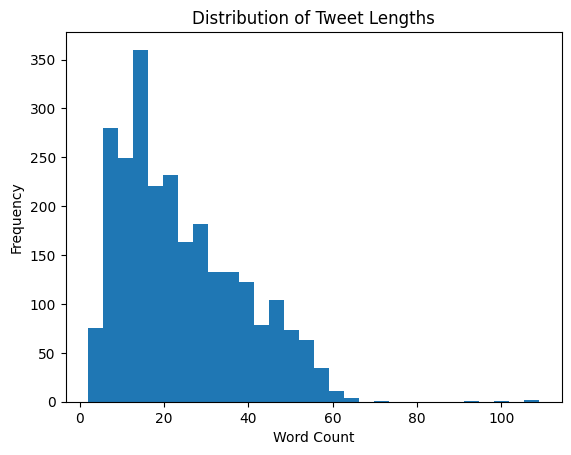

In [1]:
import matplotlib.pyplot as plt

# Ganti dengan path file Span-ASTE-mu
file_path = 'ori.txt'

# Baca setiap baris dan ambil teks sebelum delimiter '#### #### ####'
tweet_texts = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        text = line.split('#### #### ####')[0].strip()
        tweet_texts.append(text)

# Hitung jumlah kata per tweet
word_counts = [len(t.split()) for t in tweet_texts]

# Plot histogram distribusi jumlah kata
plt.figure()
plt.hist(word_counts, bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import os
import json
import glob
import matplotlib.pyplot as plt

# Ganti dengan path ke direktori log train kalian
log_dir = r"D:/KULIAH/Semester 6/MBKM/Bangkit2024/Entrepeneur Track/Unsmoke/Machine Learning/TA/Span-ASTE/outputs/TJ - Overall Dataset/seed_4 v1.9 (49%)/weights/log/train"

# Ambil semua file .json di direktori, urutkan berdasarkan nama (asumsi '0.json', '1.json', ...)
json_files = sorted(glob.glob(os.path.join(log_dir, "*.json")),
                    key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

epochs = []
training_loss = []
relation_f1 = []
mean_relation_f1 = []

for filepath in json_files:
    with open(filepath, "r") as f:
        data = json.load(f)
        epochs.append(data["epoch"])
        training_loss.append(data["training_loss"])
        relation_f1.append(data["training__None__relation_f1"])
        mean_relation_f1.append(data["training_MEAN__relation_f1"])

# Plotting
plt.figure()
plt.plot(epochs, training_loss, marker='o', label="Training Loss")
plt.plot(epochs, relation_f1, marker='x', label="Relation F1")
plt.plot(epochs, mean_relation_f1, marker='s', label="Mean Relation F1")
plt.title("Progress Training per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


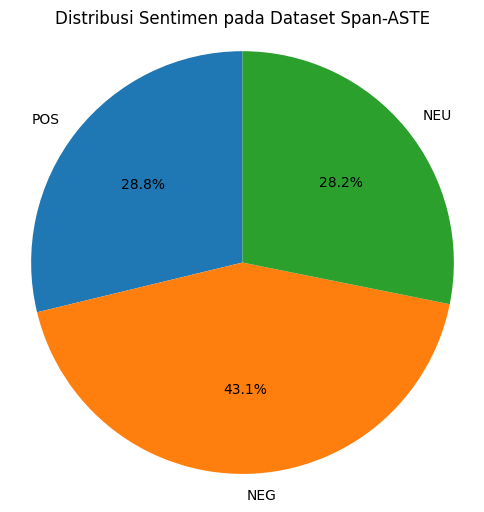

In [2]:
# distribusi sentimen dalam pie chart

import matplotlib.pyplot as plt
import ast

# Inisialisasi counter untuk sentimen
sentiment_counts = {"POS": 0, "NEG": 0, "NEU": 0}

# Baca file ori.txt
with open('ori.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Ambil bagian triplet setelah delimiter
        try:
            triples_str = line.split('#### #### ####')[-1]
            triples = ast.literal_eval(triples_str)
            for _, _, sentiment in triples:
                if sentiment in sentiment_counts:
                    sentiment_counts[sentiment] += 1
        except (ValueError, SyntaxError):
            # Lewati baris yang tidak valid
            continue

# Siapkan data untuk pie chart
labels = list(sentiment_counts.keys())
sizes = [sentiment_counts[lbl] for lbl in labels]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen pada Dataset Span-ASTE')
plt.axis('equal')  # agar pie berbentuk lingkaran
plt.show()


In [3]:
# histogram distribusi aspek

import ast
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Inisialisasi tokenizer IndoBERTweet
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")

# Kumpulkan panjang token aspek
aspect_lengths = []
with open("ori.txt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("#### #### ####")
        if len(parts) < 2:
            continue
        try:
            triples = ast.literal_eval(parts[-1])
        except Exception:
            continue
        tokens = parts[0].split()
        for t_span, _, _ in triples:
            start, end = t_span
            aspect_text = " ".join(tokens[start:end+1])
            # Tokenisasi dan hitung panjang
            tok = tokenizer.tokenize(aspect_text)
            aspect_lengths.append(len(tok))

# Plot histogram
plt.figure(figsize=(8,5))
bins = range(1, max(aspect_lengths)+2)
plt.hist(aspect_lengths, bins=bins, edgecolor='black', align='left')
plt.title("Distribusi Panjang Token Aspek")
plt.xlabel("Jumlah Token per Aspek")
plt.ylabel("Frekuensi")
plt.xticks(bins)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'transformers'